<a href="https://www.kaggle.com/code/ashkanforootan/af-iot-soil-air-humidty-check-for-greenhouse?scriptVersionId=147265484" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <h1 style='background:GoldenRod; border:0; border-radius: 10px; color:black'><center> In The Name Of God</center></h1>


<center><img src='https://ashkanforootan.com/ashkanforootanlogo.gif' ></center><br>

Visit simulator page to view full project:
https://wokwi.com/projects/378995170741868545

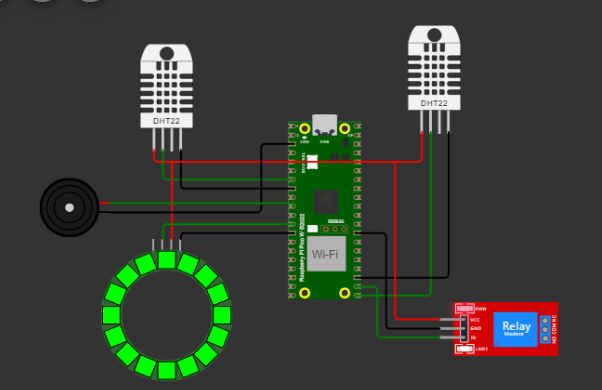

In [6]:
# Import necessary libraries
import machine
import dht
import time
from neopixel import NeoPixel

# Define GPIO pin for DHT22 sensor
dht_pin = machine.Pin(6, machine.Pin.IN, machine.Pin.PULL_UP)

# Initialize DHT22 sensor objects for air and soil humidity
d_soil = dht.DHT22(machine.Pin(16)) # Assuming it's a soil humidity sensor due to the absence of a soil sensor
d_air = dht.DHT22(machine.Pin(5))

# Define pins for buzzer and relay
bzz_pin = machine.Pin(7, machine.Pin.OUT)
relay_pin = machine.Pin(17, machine.Pin.OUT)

# Set threshold values for soil and air humidity
Low_Soil_humidity = 20  # Soil humidity threshold to initiate irrigation
high_Air_humidity = 60  # Air humidity threshold to trigger a warning

# Initialize NeoPixel object for LED control
pixels = NeoPixel(machine.Pin(9), 16)
color = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # RGB values for LED colors

# Set temperature thresholds for LED color indication
High_temp = 32
Low_temp = 24

# Function to read data from DHT22 sensors
def read_dht22():
    d_soil.measure()
    d_air.measure()
    return d_air.temperature(), d_air.humidity(), d_soil.humidity()

# Main loop to continuously read and process sensor data
while True:
    # Read data from DHT22 sensors
    temp_air, humidity_air, humidity_soil = read_dht22()
    
    # Print air and soil humidity data to console
    print("Air Temperature: ", temp_air, "°C")
    print("Air Humidity: ", humidity_air, "%")
    print("Soil Humidity: ", humidity_soil, "%")

    # Check and respond to low soil humidity
    if humidity_soil <= Low_Soil_humidity:
        print("Low Soil Humidity: ", humidity_soil, "% !!!")
        # Turn on the relay for 1 second to initiate irrigation
        relay_pin.on()
    elif humidity_soil > Low_Soil_humidity:
        # Turn off the relay if soil humidity is above the threshold
        relay_pin.off()

    # Check and respond to high air humidity
    if humidity_air > high_Air_humidity:
        print("High air humidity :", humidity_air, "% !!!")
        # Activate buzzer for a short duration
        bzz_pin.on()
        time.sleep(0.1)
        bzz_pin.off()

    # Set LED color based on air temperature
    if temp_air > High_temp:
        col = 0  # Red color for high temperature
    elif temp_air < Low_temp:
        col = 2  # Blue color for low temperature
    else:
        col = 1  # Green color for normal temperature

    # Update NeoPixel LED colors
    for i in range(16):
        pixels[i] = color[col]
        pixels.write()
        time.sleep(0.001)

    # Wait for 1 second before the next iteration
    time.sleep(1)


**Internet of Things (IoT) and Micropython on Raspberry Pi Pico W:**

The Internet of Things (IoT) is a technology paradigm that involves connecting physical devices to the internet to collect and exchange data. These connected devices, or "things," can include a wide range of objects, from everyday household items to industrial machinery. IoT enables these devices to communicate, share information, and perform actions based on the data they collect.

Micropython is a lean and efficient implementation of Python 3 for microcontrollers, a type of embedded system. It is designed to run on resource-constrained devices and provides a Python interpreter optimized for microcontrollers. Micropython is well-suited for IoT applications where Python's ease of use and rapid development capabilities are desired in resource-constrained environments.

The Raspberry Pi Pico W is a microcontroller board developed by the Raspberry Pi Foundation. It features the RP2040 microcontroller, which is designed by the Raspberry Pi team. The Pico W includes built-in wireless capabilities, making it suitable for IoT projects. It supports Micropython, allowing developers to leverage Python for programming IoT applications on this microcontroller.



**Understanding the Provided Code:**

The provided code is a Python script written for a microcontroller environment, likely targeting the Raspberry Pi Pico W. Here's a breakdown of its functionality:

1. **Sensor Initialization:**
   - The script begins by importing necessary libraries for GPIO (General Purpose Input/Output) control, DHT22 sensor readings, timing, and NeoPixel LED control.

   - GPIO pins are defined for a DHT22 sensor, a buzzer, and a relay. The DHT22 sensor pins are used to measure air and assumed soil humidity.

2. **Sensor Thresholds and LED Setup:**
   - Threshold values are set for low soil humidity, triggering irrigation, and high air humidity, triggering a warning. LED colors are defined for different temperature ranges.

3. **DHT22 Sensor Reading Function:**
   - A function (`read_dht22()`) is defined to read temperature and humidity data from the DHT22 sensors.

4. **Main Loop:**
   - The main loop continuously reads sensor data, prints it to the console, and performs actions based on the readings.

   - If soil humidity is below a set threshold, a relay is briefly turned on (assumed for irrigation). If soil humidity is above the threshold, the relay is turned off.

   - If air humidity exceeds a threshold, a buzzer is briefly activated as a warning.

   - LED colors are set based on air temperature, providing a visual indication of temperature conditions.

   - The loop then waits for one second before the next iteration.



In summary, this script demonstrates a simple IoT application on a microcontroller (Raspberry Pi Pico W) using Micropython. It reads data from DHT22 sensors, controls a relay for irrigation, activates a buzzer for high air humidity, and uses NeoPixel LEDs to display temperature conditions visually.